# Datasets 

https://www.kaggle.com/code/dataranch/offensive-stats-eda-model-comparison/input

https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022/data

Kaggle Data

In [533]:
import pandas as pd
import kagglehub
import os

# Fetch data from Kaggle API
try:
    path = kagglehub.dataset_download("philiphyde1/nfl-stats-1999-2022")  # Downloads the dataset
    print("Data downloaded from Kaggle to:", path)
except Exception as e:
    print(f"Failed to download data from Kaggle: {e}")

# Get the list of files in the downloaded directory dynamically
downloaded_files = os.listdir(path)

# Read each file dynamically (instead of hardcoding paths)
dataframes = []

for file_name in downloaded_files:
    # Skip non-CSV files like .DS_Store
    if not file_name.endswith('.csv'):
        print(f"Skipping non-CSV file: {file_name}")
        continue
    
    file_path = os.path.join(path, file_name)
    try:
        if '2024_player_predictions' in file_name:
                pred_df = pd.read_csv(file_path)
                print(f"Data loaded successfully from: {file_path} (2024_player_predictions.csv)")
        elif 'weekly_player_data' in file_name:
                week_df = pd.read_csv(file_path)
                print(f"Data loaded successfully from: {file_path} (weekly_player_data.csv)")
        elif 'yearly_player_data' in file_name:
                year_df = pd.read_csv(file_path)
                print(f"Data loaded successfully from: {file_path} (yearly_player_data.csv)")
    except Exception as e:
            print(f"Failed to load data from {file_path}: {e}")

# Check if the specific dataframes are loaded correctly
if pred_df is not None:
    print("2024 Player Predictions DataFrame:")
    print(pred_df.head())
else:
    print("Failed to load 2024_player_predictions.csv")

if week_df is not None:
    print("Weekly Player Data DataFrame:")
    print(week_df.head())
else:
    print("Failed to load weekly_player_data.csv")

if year_df is not None:
    print("Yearly Player Data DataFrame:")
    print(year_df.head())
else:
    print("Failed to load yearly_player_data.csv")




Data downloaded from Kaggle to: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/weekly_player_data.csv (weekly_player_data.csv)
Skipping non-CSV file: .DS_Store
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/2024_player_predictions.csv (2024_player_predictions.csv)
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/yearly_player_data.csv (yearly_player_data.csv)
2024 Player Predictions DataFrame:
  team   player_id   player_name position  depth  draft_year  draft_round  \
0  BUF  00-0034857    Josh Allen       QB      1        2018            1   
1  DAL  00-0036358   CeeDee Lamb       WR      1        2020            1   
2  DAL  00-0033077  Dak Prescott       QB      1        2016      

Inspect columns of each dataset

In [534]:
print(pred_df.columns)
print(week_df.columns)
print(year_df.columns)

Index(['team', 'player_id', 'player_name', 'position', 'depth', 'draft_year',
       'draft_round', 'draft_pick', 'draft_ovr', 'height', 'weight', 'college',
       'age', 'seasons_played', 'rush_attempts', 'rushing_yards', 'touches',
       'receptions', 'targets', 'receiving_yards', 'yards_after_catch',
       'total_yards', 'total_tds', 'run_td', 'reception_td',
       'fantasy_points_ppr', 'position_fantasy_rank', 'total_fantasy_rank',
       'pass_attempts', 'complete_pass', 'incomplete_pass', 'passing_yards',
       'passing_air_yards', 'interception', 'pass_td'],
      dtype='object')
Index(['team', 'player_id', 'player_name', 'position', 'season', 'week',
       'game_type', 'pass_attempts', 'complete_pass', 'incomplete_pass',
       'passing_yards', 'passing_air_yards', 'pass_td', 'interception',
       'pass_fumble_lost', 'targets', 'receptions', 'receiving_yards',
       'receiving_air_yards', 'yards_after_catch', 'reception_td',
       'reception_fumble_lost', 'rush_attempt

In [535]:
for file_name in downloaded_files:
    # Skip non-CSV files like .DS_Store
    if not file_name.endswith('.csv'):
        print(f"Skipping non-CSV file: {file_name}")
        continue
    
    file_path = os.path.join(path, file_name)
    try:
        print(f"Loading CSV file: {file_name}")
        df = pd.read_csv(file_path)
        dataframes.append(df)
        print(f"Data loaded successfully from: {file_path}")
    except Exception as e:
        print(f"Failed to load data from {file_path}: {e}")


Loading CSV file: yearly_team_data.csv
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/yearly_team_data.csv
Loading CSV file: weekly_player_data.csv
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/weekly_player_data.csv
Skipping non-CSV file: .DS_Store
Loading CSV file: 2024_player_predictions.csv
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/2024_player_predictions.csv
Loading CSV file: yearly_player_data.csv
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/yearly_player_data.csv
Loading CSV file: weekly_team_data.csv
Data loaded successfully from: /Users/salomerivas/.cache/kagglehub/datasets/philiphyde1/nfl-stats-1999-2022/versions/10/weekly_team_data.csv


# Yearly Data 

Overview of the Dataset 

In [536]:
import pandas as pd

# Check the shape
print("Dataset Shape:", year_df.shape)

print(year_df.head())

print(year_df.tail())

# List the column names
print(year_df.columns)

# Check data types for each column
print(year_df.dtypes)

Dataset Shape: (5663, 195)
  team   player_id player_name position  season  depth  pass_attempts  \
0  TEN  00-0035676  A.J. Brown       WR    2019    2.0            0.0   
1  TEN  00-0035676  A.J. Brown       WR    2020    1.0            0.0   
2  TEN  00-0035676  A.J. Brown       WR    2021    1.0            2.0   
3  PHI  00-0035676  A.J. Brown       WR    2022    1.0            0.0   
4  PHI  00-0035676  A.J. Brown       WR    2023    1.0            0.0   

   complete_pass  incomplete_pass  passing_yards  ...  vacated_receptions  \
0            0.0              0.0            0.0  ...               147.0   
1            0.0              0.0            0.0  ...                62.0   
2            0.0              2.0            0.0  ...                74.0   
3            0.0              0.0            0.0  ...               135.0   
4            0.0              0.0            0.0  ...                47.0   

   vacated_receiving_yards  vacated_receiving_air_yards  \
0           

In [537]:
if 'player_name' in year_df.columns:
    print("The 'player_name' column exists!")
else:
    print("The 'player_name' column does not exist.")
print(year_df.player_name)

The 'player_name' column exists!
0           A.J. Brown
1           A.J. Brown
2           A.J. Brown
3           A.J. Brown
4           A.J. Brown
             ...      
5658         Zay Jones
5659         Zay Jones
5660         Zay Jones
5661    Zonovan Knight
5662    Zonovan Knight
Name: player_name, Length: 5663, dtype: object


In [538]:
nan_player_name2 = year_df[year_df['player_name'].isna()]
print(nan_player_name2)

Empty DataFrame
Columns: [team, player_id, player_name, position, season, depth, pass_attempts, complete_pass, incomplete_pass, passing_yards, passing_air_yards, pass_td, interception, pass_fumble_lost, targets, receptions, receiving_yards, receiving_air_yards, yards_after_catch, reception_td, reception_fumble_lost, rush_attempts, rushing_yards, run_td, run_fumble_lost, fantasy_points_ppr, air_yards_share, target_share, comp_pct, int_pct, pass_td_pct, ypa, rec_td_pct, yptarget, ypr, rush_td_pct, ypc, touches, total_tds, td_pct, total_yards, yptouch, games, pass_ypg, rec_ypg, rush_ypg, ypg, ppg, passer_rating, game_type, offense_pct, delta_depth, delta_pass_attempts, delta_targets, delta_rush_attempts, delta_air_yards_share, delta_target_share, delta_comp_pct, delta_int_pct, delta_pass_td_pct, delta_ypa, delta_rec_td_pct, delta_yptarget, delta_rush_td_pct, delta_ypc, delta_touches, delta_td_pct, delta_yptouch, delta_games, delta_pass_ypg, delta_rec_ypg, delta_rush_ypg, delta_ypg, delta_

In [539]:
year_df['player_name'] = year_df['player_name'].str.strip().str.lower()
print(year_df.player_name)

0           a.j. brown
1           a.j. brown
2           a.j. brown
3           a.j. brown
4           a.j. brown
             ...      
5658         zay jones
5659         zay jones
5660         zay jones
5661    zonovan knight
5662    zonovan knight
Name: player_name, Length: 5663, dtype: object


In [540]:
year_df

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,a.j. brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,a.j. brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,a.j. brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,a.j. brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,a.j. brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,LV,00-0033891,zay jones,WR,2021,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5659,JAX,00-0033891,zay jones,WR,2022,1.0,0.0,0.0,0.0,0.0,...,187.0,1988.0,2705.0,688.0,12.0,44.0,213.0,2.0,895.0,5908.0
5660,JAX,00-0033891,zay jones,WR,2023,1.0,0.0,0.0,0.0,0.0,...,223.0,2164.0,2396.0,1189.0,7.0,310.0,1302.0,10.0,533.0,3466.0
5661,NYJ,00-0037157,zonovan knight,RB,2022,2.0,0.0,0.0,0.0,0.0,...,101.0,1044.0,1525.0,433.0,7.0,248.0,1052.0,6.0,747.0,4072.0


# Touchdowns 

Top 10 players with the most touchdowns in 2020:(rushing or reception, no passing which means no quarterbacks)

In [541]:
# Filter the data to include only season 2020
year_2020_df = year_df[year_df['season'] == 2020].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2020_df.fillna({'reception_td': 0, 'run_td': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2020
year_2020_df.loc[:, 'total_touchdowns'] = year_2020_df['reception_td'] + year_2020_df['run_td']

# Group by player name and sum the total touchdowns for 2020
touchdowns_per_player_2020 = year_2020_df.groupby('player_name')['total_touchdowns'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_touchdown_players_2020 = touchdowns_per_player_2020.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most touchdowns in 2020:")
print(top_10_touchdown_players_2020)


Top 10 players with the most touchdowns in 2020:
player_name
alvin kamara       21.0
dalvin cook        19.0
davante adams      19.0
tyreek hill        17.0
derrick henry      17.0
adam thielen       14.0
jonathan taylor    13.0
cam newton         13.0
mike evans         13.0
a.j. brown         12.0
Name: total_touchdowns, dtype: float64


Top 10 players with the most touchdowns in 2021:(rushing or reception, no passing which means no quarterbacks)

In [542]:
# Filter the data to include only season 2021
year_2021_df = year_df[year_df['season'] == 2021].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2021_df.fillna({'reception_td': 0, 'run_td': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2021
year_2021_df.loc[:, 'total_touchdowns'] = year_2021_df['reception_td'] + year_2021_df['run_td']

# Group by player name and sum the total touchdowns for 2021
touchdowns_per_player_2021 = year_2021_df.groupby('player_name')['total_touchdowns'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_touchdown_players_2021 = touchdowns_per_player_2021.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most touchdowns in 2021:")
print(top_10_touchdown_players_2021)


Top 10 players with the most touchdowns in 2021:
player_name
austin ekeler      21.0
jonathan taylor    20.0
james conner       18.0
joe mixon          17.0
cooper kupp        17.0
damien harris      15.0
deebo samuel       14.0
mike evans         14.0
ja'marr chase      14.0
ezekiel elliott    12.0
Name: total_touchdowns, dtype: float64


Top 10 players with the most touchdowns in 2022: (rushing or reception, no passing which means no quarterbacks)

In [543]:
# Filter the data to include only season 2022
year_2022_df = year_df[year_df['season'] == 2022].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2022_df.fillna({'reception_td': 0, 'run_td': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2021
year_2022_df.loc[:, 'total_touchdowns'] = year_2022_df['reception_td'] + year_2022_df['run_td']

# Group by player name and sum the total touchdowns for 2021
touchdowns_per_player_2022 = year_2022_df.groupby('player_name')['total_touchdowns'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_touchdown_players_2022 = touchdowns_per_player_2022.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most touchdowns in 2022:")
print(top_10_touchdown_players_2022)

Top 10 players with the most touchdowns in 2022:
player_name
austin ekeler          18.0
jamaal williams        17.0
davante adams          15.0
derrick henry          14.0
christian mccaffrey    14.0
nick chubb             13.0
jalen hurts            13.0
josh jacobs            12.0
ezekiel elliott        12.0
tony pollard           12.0
Name: total_touchdowns, dtype: float64


Top 10 players with the most touchdowns in 2023: (rushing or reception, no passing which means no quarterbacks)

In [544]:
# Filter the data to include only season 2023
year_2023_df = year_df[year_df['season'] == 2023].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2023_df.fillna({'reception_td': 0, 'run_td': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2021
year_2023_df.loc[:, 'total_touchdowns'] = year_2023_df['reception_td'] + year_2023_df['run_td']

# Group by player name and sum the total touchdowns for 2021
touchdowns_per_player_2023 = year_2023_df.groupby('player_name')['total_touchdowns'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_touchdown_players_2023 = touchdowns_per_player_2023.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most touchdowns in 2023:")
print(top_10_touchdown_players_2023)

Top 10 players with the most touchdowns in 2023:
player_name
christian mccaffrey    22.0
raheem mostert         21.0
jalen hurts            15.0
josh allen             15.0
kyren williams         15.0
tyreek hill            14.0
ceedee lamb            14.0
david montgomery       13.0
mike evans             13.0
gus edwards            13.0
Name: total_touchdowns, dtype: float64


Player in top 10 all 4 years

In [545]:
# Convert the player names from each year's top 10 list to sets
top_10_touchdown_players_2020 = set(top_10_touchdown_players_2020.index)
top_10_touchdown_players_2021 = set(top_10_touchdown_players_2021.index)
top_10_touchdown_players_2022 = set(top_10_touchdown_players_2022.index)
top_10_touchdown_players_2023 = set(top_10_touchdown_players_2023.index)

# Find the intersection of all four sets
consistent_top_10_players = top_10_touchdown_players_2020 & top_10_touchdown_players_2021 & top_10_touchdown_players_2022 & top_10_touchdown_players_2023

# Convert the result to a list
consistent_top_10_players_list = list(consistent_top_10_players)

# Print the list
print("List of players in the top 10 for touchdowns in all four years (2020-2023):")
print(consistent_top_10_players_list)


List of players in the top 10 for touchdowns in all four years (2020-2023):
[]


There is not a single player that has been in the top 10 for touchdowns in the last 4 seasons

List of players that have appeared in the top 10 at least twice in the last four years

In [546]:
from collections import Counter

# Assume the top 10 players for each year are sets already
top_10_touchdown_players_2020 = set(top_10_touchdown_players_2020)
top_10_touchdown_players_2021 = set(top_10_touchdown_players_2021)
top_10_touchdown_players_2022 = set(top_10_touchdown_players_2022)
top_10_touchdown_players_2023 = set(top_10_touchdown_players_2023)

# Combine all players into a single list
all_top_10_players = list(top_10_touchdown_players_2020) + \
                     list(top_10_touchdown_players_2021) + \
                     list(top_10_touchdown_players_2022) + \
                     list(top_10_touchdown_players_2023)

# Count the occurrences of each player
player_counts = Counter(all_top_10_players)

# Filter players who appeared at least twice
consistent_top_10_players = {player: count for player, count in player_counts.items() if count >= 2}

# Print the results
print("Players in the top 10 for touchdowns in at least two of the four years (2020-2023):")
for player, count in consistent_top_10_players.items():
    print(f"{player}: {count} appearances")


Players in the top 10 for touchdowns in at least two of the four years (2020-2023):
tyreek hill: 2 appearances
mike evans: 3 appearances
jonathan taylor: 2 appearances
derrick henry: 2 appearances
davante adams: 2 appearances
ezekiel elliott: 2 appearances
austin ekeler: 2 appearances
christian mccaffrey: 2 appearances
jalen hurts: 2 appearances


In [547]:
print(consistent_top_10_players)

{'tyreek hill': 2, 'mike evans': 3, 'jonathan taylor': 2, 'derrick henry': 2, 'davante adams': 2, 'ezekiel elliott': 2, 'austin ekeler': 2, 'christian mccaffrey': 2, 'jalen hurts': 2}


Total Touchdowns for the top 10 players that have appeared at least twice in the top ten the last 4 seasons 2020-2023 

In [548]:
# List of players to calculate total touchdowns
players = {'davante adams': 2, 'derrick henry': 2, 'mike evans': 3, 'tyreek hill': 2, 
           'jonathan taylor': 2, 'ezekiel elliott': 2, 'austin ekeler': 2, 'jalen hurts': 2, 
           'christian mccaffrey': 2}

# Initialize a dictionary to store the total touchdowns for each player
total_touchdowns_dict = {}

# Loop over each season (2020 to 2023)
for year in range(2020, 2023):
    # Filter the data to include only the current season and relevant players
    year_df_filtered = year_df[(year_df['season'] == year) & (year_df['player_name'].isin(players.keys()))].copy()
    
    # Fill NaN values for touchdowns
    year_df_filtered.fillna({'reception_td': 0, 'run_td': 0}, inplace=True)

    # Calculate total touchdowns for each player
    year_df_filtered['total_touchdowns'] = year_df_filtered['reception_td'] + year_df_filtered['run_td']

    # Group by player name and sum the total touchdowns for the current year
    touchdowns_per_player = year_df_filtered.groupby('player_name')['total_touchdowns'].sum()

    # Add the yearly total touchdowns to the dictionary (adding over multiple years)
    for player, touchdowns in touchdowns_per_player.items():
        if player in total_touchdowns_dict:
            total_touchdowns_dict[player] += touchdowns
        else:
            total_touchdowns_dict[player] = touchdowns

# Print the total touchdowns for each player across the seasons 2020-2024
for player, touchdowns in total_touchdowns_dict.items():
    print(f"{player}: {touchdowns} total touchdowns")

austin ekeler: 42.0 total touchdowns
christian mccaffrey: 22.0 total touchdowns
davante adams: 45.0 total touchdowns
derrick henry: 41.0 total touchdowns
ezekiel elliott: 34.0 total touchdowns
jalen hurts: 26.0 total touchdowns
jonathan taylor: 37.0 total touchdowns
mike evans: 33.0 total touchdowns
tyreek hill: 35.0 total touchdowns


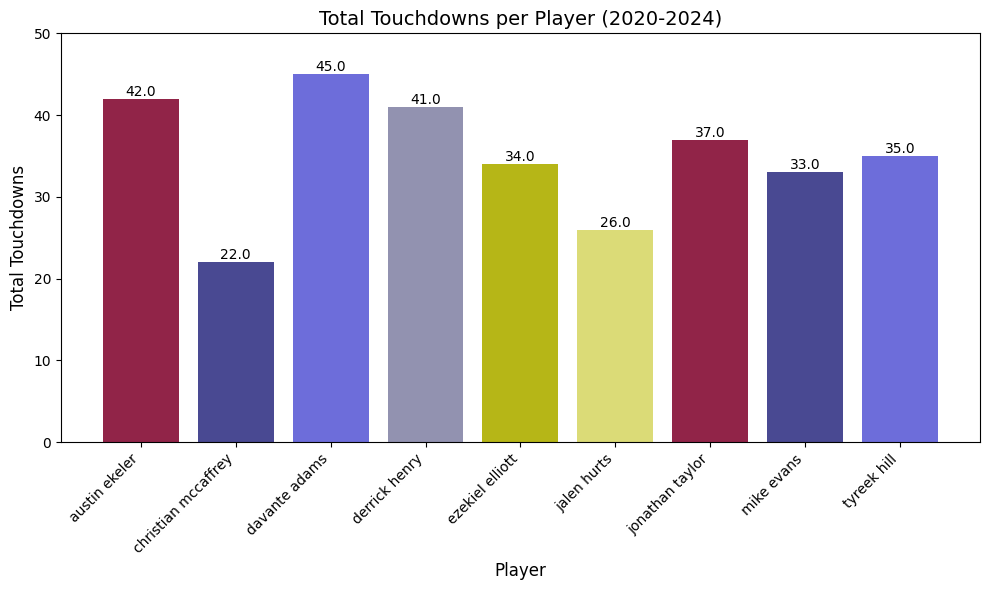

In [549]:
import matplotlib.pyplot as plt

# Data (Example data, replace with your actual data from `total_touchdowns_dict`)
players = list(total_touchdowns_dict.keys())
touchdowns = list(total_touchdowns_dict.values())

# Generate distinct colors for each player
colors = sns.color_palette(palette='gist_stern') 

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(players, touchdowns, color=colors)

# Add title and labels
plt.title('Total Touchdowns per Player (2020-2024)', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Total Touchdowns', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks in intervals of 5
plt.yticks(range(0, int(max(touchdowns)) + 10, 10))

# Add the number of touchdowns above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# Receptions

Top 10 players with the most receptions in 2020

In [550]:
# Filter the data to include only season 2020
year_2020_df = year_df[year_df['season'] == 2020].copy()

# Fill NaN values for receptions
year_2020_df.fillna({'receptions': 0}, inplace=True)

# Calculate total receptions for each player in season 2020
year_2020_df.loc[:, 'total_receptions'] = year_2020_df['receptions']

# Group by player name and sum the total receptions
receptions_per_player_2020 = year_2020_df.groupby('player_name')['total_receptions'].sum()

# Sort the players by total receptions in descending order and select the top 10
top_10_receptions_players_2020 = receptions_per_player_2020.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most receptions in 2020:")
for player, receptions in top_10_receptions_players_2020.items():
    print(f"{player}: {receptions} receptions")


Top 10 players with the most receptions in 2020:
stefon diggs: 127.0 receptions
davante adams: 115.0 receptions
deandre hopkins: 115.0 receptions
darren waller: 107.0 receptions
travis kelce: 105.0 receptions
allen robinson: 102.0 receptions
tyler lockett: 100.0 receptions
keenan allen: 100.0 receptions
juju smith-schuster: 97.0 receptions
cooper kupp: 92.0 receptions


Top 10 players with the most receptions in 2021


In [551]:
# Filter the data to include only season 2020
year_2021_df = year_df[year_df['season'] == 2021].copy()

# Fill NaN values for receptions
year_2021_df.fillna({'receptions': 0}, inplace=True)

# Calculate total receptions for each player in season 2020
year_2021_df.loc[:, 'total_receptions'] = year_2021_df['receptions']

# Group by player name and sum the total receptions
receptions_per_player_2021 = year_2021_df.groupby('player_name')['total_receptions'].sum()

# Sort the players by total receptions in descending order and select the top 10
top_10_receptions_players_2021 = receptions_per_player_2021.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most receptions in 2021:")
for player, receptions in top_10_receptions_players_2021.items():
    print(f"{player}: {receptions} receptions")


Top 10 players with the most receptions in 2021:
cooper kupp: 145.0 receptions
davante adams: 123.0 receptions
tyreek hill: 111.0 receptions
justin jefferson: 108.0 receptions
mark andrews: 107.0 receptions
diontae johnson: 107.0 receptions
keenan allen: 106.0 receptions
jaylen waddle: 104.0 receptions
hunter renfrow: 103.0 receptions
stefon diggs: 103.0 receptions


Top 10 players with the most receptions in 2022

In [552]:
# Filter the data to include only season 2022
year_2022_df = year_df[year_df['season'] == 2022].copy()

# Fill NaN values for receptions
year_2022_df.fillna({'receptions': 0}, inplace=True)

# Calculate total receptions for each player in season 2020
year_2022_df.loc[:, 'total_receptions'] = year_2022_df['receptions']

# Group by player name and sum the total receptions
receptions_per_player_2022 = year_2022_df.groupby('player_name')['total_receptions'].sum()

# Sort the players by total receptions in descending order and select the top 10
top_10_receptions_players_2022 = receptions_per_player_2022.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most receptions in 2022:")
for player, receptions in top_10_receptions_players_2022.items():
    print(f"{player}: {receptions} receptions")


Top 10 players with the most receptions in 2022:
justin jefferson: 128.0 receptions
tyreek hill: 119.0 receptions
travis kelce: 110.0 receptions
stefon diggs: 108.0 receptions
austin ekeler: 107.0 receptions
ceedee lamb: 107.0 receptions
amon-ra st. brown: 106.0 receptions
chris godwin: 104.0 receptions
davante adams: 100.0 receptions
michael pittman: 99.0 receptions


Top 10 players with the most receptions in 2023


In [553]:
# Filter the data to include only season 20203
year_2023_df = year_df[year_df['season'] == 2023].copy()

# Fill NaN values for receptions
year_2023_df.fillna({'receptions': 0}, inplace=True)

# Calculate total receptions for each player in season 2023
year_2023_df.loc[:, 'total_receptions'] = year_2023_df['receptions']

# Group by player name and sum the total receptions
receptions_per_player_2023 = year_2023_df.groupby('player_name')['total_receptions'].sum()

# Sort the players by total receptions in descending order and select the top 10
top_10_receptions_players_2023 = receptions_per_player_2023.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most receptions in 2023:")
for player, receptions in top_10_receptions_players_2023.items():
    print(f"{player}: {receptions} receptions")


Top 10 players with the most receptions in 2023:
ceedee lamb: 135.0 receptions
amon-ra st. brown: 119.0 receptions
tyreek hill: 119.0 receptions
evan engram: 114.0 receptions
michael pittman: 109.0 receptions
keenan allen: 108.0 receptions
stefon diggs: 107.0 receptions
a.j. brown: 106.0 receptions
puka nacua: 105.0 receptions
davante adams: 103.0 receptions


List of players in the top 10 for receptions in all four years (2020-2023):

In [554]:
# Convert the player names from each year's top 10 list to sets
top_10_receptions_players_2020 = set(top_10_receptions_players_2020.index)
top_10_receptions_players_2021 = set(top_10_receptions_players_2021.index)
top_10_receptions_players_2022 = set(top_10_receptions_players_2022.index)
top_10_receptions_players_2023 = set(top_10_receptions_players_2023.index)

# Find the intersection of all four sets
consistent_top_10_receptions_players = top_10_receptions_players_2020 & top_10_receptions_players_2021 & top_10_receptions_players_2022 & top_10_receptions_players_2023

# Convert the result to a list
consistent_top_10_receptions_players_list = list(consistent_top_10_receptions_players)

# Print the list
print("List of players in the top 10 for receptions in all four years (2020-2023):")
print(consistent_top_10_receptions_players_list)


List of players in the top 10 for receptions in all four years (2020-2023):
['davante adams', 'stefon diggs']


List of players that have appeared in the top 10 at least twice in the last four years

In [555]:
from collections import Counter

# Assume the top 10 players for each year are sets already
top_10_receptions_players_2020 = set(top_10_receptions_players_2020)
top_10_receptions_players_2021 = set(top_10_receptions_players_2021)
top_10_receptions_players_2022 = set(top_10_receptions_players_2022)
top_10_receptions_players_2023 = set(top_10_receptions_players_2023)

# Combine all players into a single list
all_top_10_receptions_players = list(top_10_receptions_players_2020) + \
                     list(top_10_receptions_players_2021) + \
                     list(top_10_receptions_players_2022) + \
                     list(top_10_receptions_players_2023)

# Count the occurrences of each player
player_counts_receptions = Counter(all_top_10_receptions_players)

# Filter players who appeared at least twice
consistent_top_10_reception_players = {player: count for player, count in player_counts_receptions.items() if count >= 2}

# Print the results
print("Players in the top 10 for receptions in at least two of the four years (2020-2023):")
for player, count in consistent_top_10_reception_players.items():
    print(f"{player}: {count} appearances")


Players in the top 10 for receptions in at least two of the four years (2020-2023):
cooper kupp: 2 appearances
keenan allen: 3 appearances
stefon diggs: 4 appearances
travis kelce: 2 appearances
davante adams: 4 appearances
tyreek hill: 3 appearances
justin jefferson: 2 appearances
ceedee lamb: 2 appearances
amon-ra st. brown: 2 appearances
michael pittman: 2 appearances


In [556]:
print(consistent_top_10_reception_players)

{'cooper kupp': 2, 'keenan allen': 3, 'stefon diggs': 4, 'travis kelce': 2, 'davante adams': 4, 'tyreek hill': 3, 'justin jefferson': 2, 'ceedee lamb': 2, 'amon-ra st. brown': 2, 'michael pittman': 2}


In [557]:
# List of players to calculate total receptions
consistent_top_10_reception_players = list(consistent_top_10_reception_players)

# Initialize a dictionary to store the total touchdowns for each player
total_reception_dict = {}

# Loop over each season (2020 to 2023)
for year in range(2020, 2023):
    # Filter the data to include only the current season and relevant players
    year_df_filtered = year_df[(year_df['season'] == year) & (year_df['player_name'].isin(consistent_top_10_reception_players))].copy()
    
    # Fill NaN values for receptions
    year_df_filtered.fillna({'receptions': 0}, inplace=True)

    # Calculate total receptions for each player
    year_df_filtered.loc[:, 'total_receptions'] = year_df_filtered['receptions']

    # Group by player name and sum the total touchdowns for the current year
    receptions_per_player = year_df_filtered.groupby('player_name')['total_receptions'].sum()

    # Add the yearly total receptions to the dictionary (adding over multiple years)
    for player, total_receptions in receptions_per_player.items():
        if player in total_reception_dict:
            total_reception_dict[player] += total_receptions
        else:
            total_reception_dict[player] = total_receptions

# Print the total touchdowns for each player across the seasons 2020-2024
for player, total_receptions in total_reception_dict.items():
    print(f"{player}: {total_receptions} total receptions")

ceedee lamb: 260.0 total receptions
cooper kupp: 312.0 total receptions
davante adams: 338.0 total receptions
justin jefferson: 324.0 total receptions
keenan allen: 272.0 total receptions
michael pittman: 227.0 total receptions
stefon diggs: 338.0 total receptions
travis kelce: 307.0 total receptions
tyreek hill: 317.0 total receptions
amon-ra st. brown: 196.0 total receptions


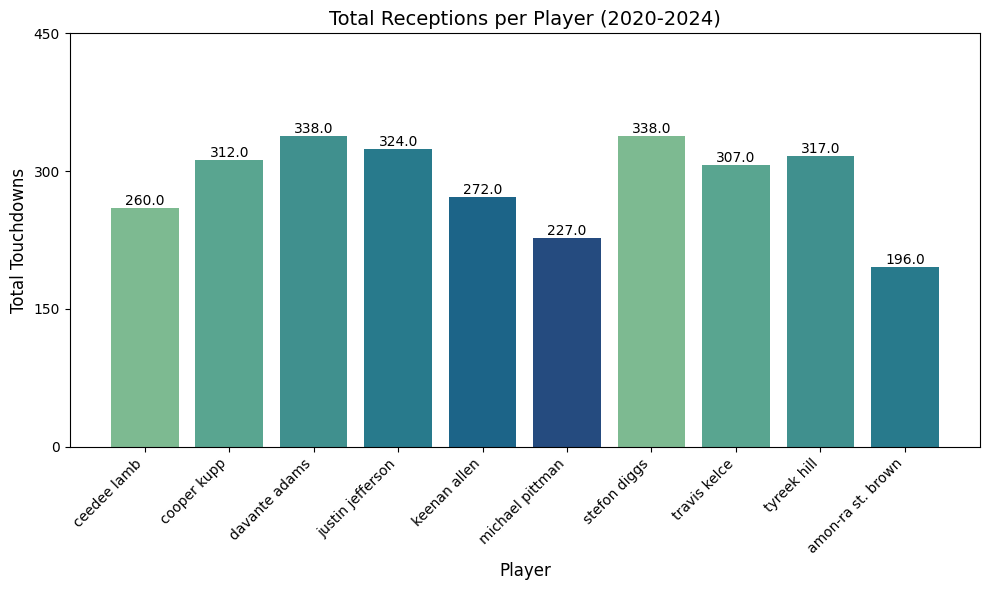

In [558]:
import matplotlib.pyplot as plt

# Data (Example data, replace with your actual data from `total_touchdowns_dict`)
players = list(total_reception_dict.keys())
total_receptions = list(total_reception_dict.values())

# Generate distinct colors for each player
colors = sns.color_palette(palette='crest')
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(players, total_receptions, color=colors)

# Add title and labels
plt.title('Total Receptions per Player (2020-2024)', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Total Touchdowns', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks in intervals of 5
plt.yticks(range(0, int(max(total_receptions)) + 150, 150))

# Add the number of touchdowns above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# Yards 

Top 10 players with the most total yardage (receiving + rushing ) from season 2020

In [559]:
# Filter the data to include only season 2020
year_2020_df = year_df[year_df['season'] == 2020].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2020_df.fillna({'receiving_yards': 0, 'rushing_yards': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2020
year_2020_df.loc[:, 'total_yards'] = year_2020_df['receiving_yards'] + year_2020_df['rushing_yards']

# Group by player name and sum the total touchdowns for 2020
yards_per_player_2020 = year_2020_df.groupby('player_name')['total_yards'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_players_yardage_2020 = yards_per_player_2020.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most total yardage (receiving + rushing ) in 2020:")
print(top_10_players_yardage_2020)


Top 10 players with the most total yardage (receiving + rushing ) in 2020:
player_name
derrick henry       2143.0
dalvin cook         1924.0
alvin kamara        1688.0
stefon diggs        1536.0
david montgomery    1510.0
jonathan taylor     1468.0
aaron jones         1459.0
travis kelce        1418.0
james robinson      1416.0
deandre hopkins     1408.0
Name: total_yards, dtype: float64


Top 10 players with the most total yardage (receiving + rushing ) from season 2021

In [560]:
# Filter the data to include only season 2021
year_2021_df = year_df[year_df['season'] == 2021].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2021_df.fillna({'receiving_yards': 0, 'rushing_yards': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2021
year_2021_df.loc[:, 'total_yards'] = year_2021_df['receiving_yards'] + year_2021_df['rushing_yards']

# Group by player name and sum the total touchdowns for 2021
yards_per_player_2021 = year_2021_df.groupby('player_name')['total_yards'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_players_yardage_2021 = yards_per_player_2021.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most total yardage (receiving + rushing ) in 2021:")
print(top_10_players_yardage_2021)


Top 10 players with the most total yardage (receiving + rushing ) in 2021:
player_name
jonathan taylor     2171.0
cooper kupp         1967.0
deebo samuel        1762.0
najee harris        1667.0
justin jefferson    1630.0
austin ekeler       1562.0
davante adams       1553.0
joe mixon           1519.0
ja'marr chase       1476.0
nick chubb          1433.0
Name: total_yards, dtype: float64


Top 10 players with the most total yardage (receiving + rushing ) from season 2022

In [561]:
# Filter the data to include only season 2022
year_2022_df = year_df[year_df['season'] == 2022].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2022_df.fillna({'receiving_yards': 0, 'rushing_yards': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2022
year_2022_df.loc[:, 'total_yards'] = year_2022_df['receiving_yards'] + year_2022_df['rushing_yards']

# Group by player name and sum the total touchdowns for 2022
yards_per_player_2022 = year_2022_df.groupby('player_name')['total_yards'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_players_yardage_2022 = yards_per_player_2022.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most total yardage (receiving + rushing ) in 2022:")
print(top_10_players_yardage_2022)


Top 10 players with the most total yardage (receiving + rushing ) in 2022:
player_name
josh jacobs            2053.0
derrick henry          1936.0
christian mccaffrey    1876.0
justin jefferson       1845.0
nick chubb             1766.0
tyreek hill            1742.0
saquon barkley         1652.0
austin ekeler          1623.0
aaron jones            1518.0
davante adams          1515.0
Name: total_yards, dtype: float64


Top 10 players with the most total yardage (receiving + rushing ) from season 2023

In [562]:
# Filter the data to include only season 2023
year_2023_df = year_df[year_df['season'] == 2023].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Fill NaN values for touchdowns
year_2023_df.fillna({'receiving_yards': 0, 'rushing_yards': 0}, inplace=True)

# Calculate total touchdowns for each player in season 2023
year_2023_df.loc[:, 'total_yards'] = year_2023_df['receiving_yards'] + year_2023_df['rushing_yards']

# Group by player name and sum the total touchdowns for 2023
yards_per_player_2023 = year_2023_df.groupby('player_name')['total_yards'].sum()

# Sort the players by total touchdowns in descending order and select the top 10
top_10_players_yardage_2023 = yards_per_player_2023.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 players with the most total yardage (receiving + rushing ) in 2023:")
print(top_10_players_yardage_2023)


Top 10 players with the most total yardage (receiving + rushing ) in 2023:
player_name
christian mccaffrey    2023.0
ceedee lamb            1864.0
tyreek hill            1814.0
breece hall            1587.0
puka nacua             1575.0
james cook             1567.0
amon-ra st. brown      1539.0
rachaad white          1539.0
travis etienne         1488.0
bijan robinson         1463.0
Name: total_yards, dtype: float64


List of players in the top 10 for most yardage in all four years (2020-2023)

In [563]:
# Convert the player names from each year's top 10 list to sets
top_10_players_yardage_2020 = set(top_10_players_yardage_2020.index)
top_10_players_yardage_2021 = set(top_10_players_yardage_2021.index)
top_10_players_yardage_2022 = set(top_10_players_yardage_2022.index)
top_10_players_yardage_2023 = set(top_10_players_yardage_2023.index)

# Find the intersection of all four sets
consistent_top_10_yardage_players = top_10_players_yardage_2020 & top_10_players_yardage_2021 & top_10_players_yardage_2022 & top_10_players_yardage_2023

# Convert the result to a list
consistent_top_10_yardage_players = list(consistent_top_10_yardage_players)

# Print the list
print("List of players in the top 10 for most yardage in all four years (2020-2023):")
print(consistent_top_10_yardage_players)


List of players in the top 10 for most yardage in all four years (2020-2023):
[]


Top 10 players with the most total yardage (receiving + rushing ) from season 2020-2024


In [564]:
from collections import Counter

# Assume the top 10 players for each year are sets already
top_10_players_yardage_2020 = set(top_10_players_yardage_2020)
top_10_players_yardage_2021 = set(top_10_players_yardage_2021)
top_10_players_yardage_2022 = set(top_10_players_yardage_2022)
top_10_players_yardage_2023 = set(top_10_players_yardage_2023)

# Combine all players into a single list
all_top_10_yardage_players = list(top_10_players_yardage_2020) + \
                     list(top_10_players_yardage_2021) + \
                     list(top_10_players_yardage_2022) + \
                     list(top_10_players_yardage_2023)

# Count the occurrences of each player
player_yardage_counts = Counter(all_top_10_yardage_players)

# Filter players who appeared at least twice
consistent_top_10_yardage_players = {player: count for player, count in player_yardage_counts.items() if count >= 2}

# Print the results
print("Players in the top 10 for most yardage in at least two of the four years (2020-2023):")
for player, count in consistent_top_10_yardage_players.items():
    print(f"{player}: {count} appearances")


Players in the top 10 for most yardage in at least two of the four years (2020-2023):
aaron jones: 2 appearances
jonathan taylor: 2 appearances
derrick henry: 2 appearances
austin ekeler: 2 appearances
justin jefferson: 2 appearances
nick chubb: 2 appearances
davante adams: 2 appearances
tyreek hill: 2 appearances
christian mccaffrey: 2 appearances


Yards per Player

In [565]:
# Initialize a dictionary to store the total yardage for each player
total_yardage_dict = {}

# Loop over each season (2020 to 2023)
for year in range(2020, 2024):  # Adjusted to include 2023
    # Filter the data to include only the current season and relevant players
    year_df_filtered = year_df[(year_df['season'] == year) & (year_df['player_name'].isin(consistent_top_10_yardage_players))].copy()
    
    # Fill NaN values for yardage
    year_df_filtered.fillna({'receiving_yards': 0, 'rushing_yards': 0}, inplace=True)

    # Calculate total yardage for each player
    year_df_filtered['total_yards'] = year_df_filtered['receiving_yards'] + year_df_filtered['rushing_yards']

    # Group by player name and sum the total yardage for the current year
    yardage_per_player = year_df_filtered.groupby('player_name')['total_yards'].sum()

    # Add the yearly total yardage to the dictionary (adding over multiple years)
    for player, total_yards in yardage_per_player.items():
        if player in total_yardage_dict:
            total_yardage_dict[player] += total_yards
        else:
            total_yardage_dict[player] = total_yards

# Print the total yardage for each player across the seasons 2020-2023
for player, total_yards in total_yardage_dict.items():
    print(f"{player}: {total_yards} total yardage")


aaron jones: 5056.0 total yardage
austin ekeler: 5170.0 total yardage
christian mccaffrey: 5055.0 total yardage
davante adams: 5591.0 total yardage
derrick henry: 6553.0 total yardage
jonathan taylor: 5537.0 total yardage
justin jefferson: 5943.0 total yardage
nick chubb: 4605.0 total yardage
tyreek hill: 6290.0 total yardage


/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/932722052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=yardage_df, y="Player", x="Total Yardage", palette="coolwarm")


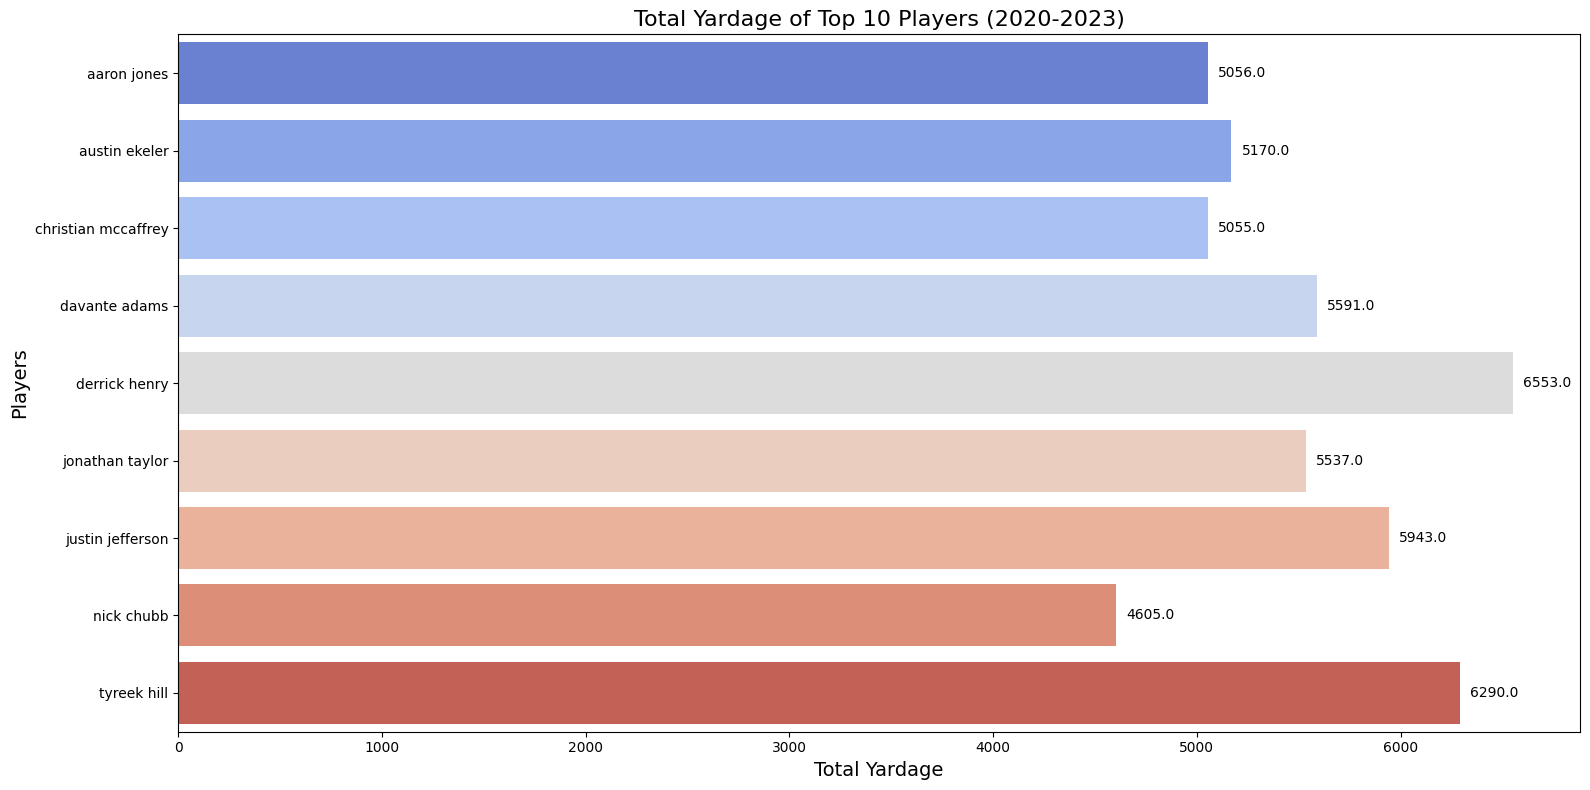

In [566]:
# Convert dictionary to DataFrame for seaborn
yardage_df = pd.DataFrame(total_yardage_dict.items(), columns=["Player", "Total Yardage"])

# Plot horizontal bar chart
plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=yardage_df, y="Player", x="Total Yardage", palette="coolwarm")

# Add titles and labels
plt.title("Total Yardage of Top 10 Players (2020-2023)", fontsize=16)
plt.xlabel("Total Yardage", fontsize=14)
plt.ylabel("Players", fontsize=14)

# Add the total yardage as annotations on each bar
for index, row in yardage_df.iterrows():
    plt.text(
        row["Total Yardage"] + 50,  # Position the text slightly to the right of the bar
        index,                     # The vertical position matches the bar
        f'{row["Total Yardage"]}', # The text to display (total yardage)
        color='black',             # Text color
        va='center',               # Vertical alignment
        fontsize=10                # Font size
    )

# Show the chart
plt.tight_layout()
plt.show()


Receiving yards: This is a statistic used in football defined as the number of yards gained by a receiver on a passing play. Included in the calculation of this statistic is the distance the ball was passed and any additional yardage the player gained after the reception.

Rushing yards: A statistic in football that records the total number of yards gained by a single player as the result of a rushing play (or plays), in which the player carries the football (as opposed to receiving a pass).

Player that has been in the top 10 of receptions, yards and touchdowns

In [567]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Example player data for top 10 receptions, yards, and touchdowns
top_10_receptions_set = set(total_reception_dict.keys())
top_10_yards_set = set(total_yardage_dict.keys())
top_10_touchdowns_set = set(total_touchdowns_dict.keys())

# Find players in all three sets
consistent_top_player_overall = top_10_receptions_set & top_10_yards_set & top_10_touchdowns_set

# Display the result
if consistent_top_player_overall:
    print("Player(s) in the top 10 of receptions, yards, and touchdowns:")
    print(consistent_top_player_overall)
else:
    print("No player is consistently in the top 10 for all three categories.")




Player(s) in the top 10 of receptions, yards, and touchdowns:
{'tyreek hill', 'davante adams'}


# Tyreek Hill and Davante Adams are the two players that for the last 4 seasons. They have constantly been in the top 10 players for receptions, yards, and touchdowns. 

# Weekly Data 

In [635]:
week_df

,team,player_id,player_name,position,season,week,game_type,pass_attempts,complete_pass,incomplete_pass,...,college,age,wins,losses,ties,win_pct,opp_wins,opp_losses,opp_ties,opp_win_pct
0,TEN,00-0035676,A.J. Brown,WR,2019,1,REG,0.0,0.0,0.0,...,Mississippi,22,1.0,0.0,0.0,1.000,0.0,1.0,0.0,0.000
1,TEN,00-0035676,A.J. Brown,WR,2019,2,REG,0.0,0.0,0.0,...,Mississippi,22,1.0,1.0,0.0,0.500,1.0,1.0,0.0,0.500
2,TEN,00-0035676,A.J. Brown,WR,2019,3,REG,0.0,0.0,0.0,...,Mississippi,22,1.0,2.0,0.0,0.333,1.0,2.0,0.0,0.333
3,TEN,00-0035676,A.J. Brown,WR,2019,4,REG,0.0,0.0,0.0,...,Mississippi,22,2.0,2.0,0.0,0.500,1.0,3.0,0.0,0.250
4,TEN,00-0035676,A.J. Brown,WR,2019,5,REG,0.0,0.0,0.0,...,Mississippi,22,2.0,3.0,0.0,0.400,4.0,1.0,0.0,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,NYJ,00-0037157,Zonovan Knight,RB,2022,15,REG,0.0,0.0,0.0,...,North Carolina State,21,7.0,7.0,0.0,0.500,7.0,7.0,0.0,0.500
50859,NYJ,00-0037157,Zonovan Knight,RB,2022,16,REG,0.0,0.0,0.0,...,North Carolina State,21,7.0,8.0,0.0,0.467,7.0,8.0,0.0,0.467
50860,NYJ,00-0037157,Zonovan Knight,RB,2022,17,REG,0.0,0.0,0.0,...,North Carolina State,21,7.0,9.0,0.0,0.438,8.0,8.0,0.0,0.500
50861,NYJ,00-0037157,Zonovan Knight,RB,2022,18,REG,0.0,0.0,0.0,...,North Carolina State,21,7.0,10.0,0.0,0.412,9.0,8.0,0.0,0.529


Overview of the Dataset 

In [636]:
if 'player_name' in week_df.columns:
    print("The 'player_name' column exists!")
else:
    print("The 'player_name' column does not exist.")
print(week_df.player_name)

The 'player_name' column exists!
0            A.J. Brown
1            A.J. Brown
2            A.J. Brown
3            A.J. Brown
4            A.J. Brown
              ...      
50858    Zonovan Knight
50859    Zonovan Knight
50860    Zonovan Knight
50861    Zonovan Knight
50862    Zonovan Knight
Name: player_name, Length: 50863, dtype: object


In [637]:
nan_player_name1 = week_df[week_df['player_name'].isna()]
print(nan_player_name1)

Empty DataFrame
Columns: [team, player_id, player_name, position, season, week, game_type, pass_attempts, complete_pass, incomplete_pass, passing_yards, passing_air_yards, pass_td, interception, pass_fumble_lost, targets, receptions, receiving_yards, receiving_air_yards, yards_after_catch, reception_td, reception_fumble_lost, rush_attempts, rushing_yards, run_td, run_fumble_lost, fantasy_points_ppr, air_yards_share, target_share, comp_pct, int_pct, pass_td_pct, ypa, rec_td_pct, yptarget, ypr, rush_td_pct, ypc, touches, total_tds, td_pct, total_yards, yptouch, passer_rating, opponent, offense_snaps, offense_pct, team_snaps, team_yards, yards_pct, draft_year, draft_round, draft_pick, draft_ovr, height, weight, college, age, wins, losses, ties, win_pct, opp_wins, opp_losses, opp_ties, opp_win_pct]
Index: []

[0 rows x 66 columns]


2023 Weekly Data 

In [638]:
# Filter the DataFrame for the 2023 season
players_2023_df = week_df[week_df['season'] == 2023]

# Display the new filtered DataFrame
print(players_2023_df)


      team   player_id     player_name position  season  week game_type  \
57     PHI  00-0035676      A.J. Brown       WR    2023     1       REG   
58     PHI  00-0035676      A.J. Brown       WR    2023     2       REG   
59     PHI  00-0035676      A.J. Brown       WR    2023     3       REG   
60     PHI  00-0035676      A.J. Brown       WR    2023     4       REG   
61     PHI  00-0035676      A.J. Brown       WR    2023     5       REG   
...    ...         ...             ...      ...     ...   ...       ...   
50776  BAL  00-0039064     Zay Flowers       WR    2023    17       REG   
50852  JAX  00-0033891       Zay Jones       WR    2023     1       REG   
50853  JAX  00-0033891       Zay Jones       WR    2023     2       REG   
50854  JAX  00-0033891       Zay Jones       WR    2023     5       REG   
50862  DET  00-0037157  Zonovan Knight       RB    2023     5       REG   

       pass_attempts  complete_pass  incomplete_pass  ...  \
57               0.0            0.0   

Top 3 players with the most average touchdowns, average receptions and average yardage for the 2023 season

In [639]:
# Calculate the total touchdowns, receptions, and yardage for each player
players_2023_df['total_touchdowns'] = players_2023_df['reception_td'] + players_2023_df['run_td']
players_2023_df['total_yards'] = players_2023_df['receiving_yards'] + players_2023_df['rushing_yards']

# Group by player and calculate the averages
average_stats_2023 = (
    players_2023_df.groupby('player_name')
    .agg({
        'total_touchdowns': 'mean',  # Average weekly total touchdowns
        'receptions': 'mean',        # Average weekly receptions
        'total_yards': 'mean'        # Average weekly total yards
    })
    .rename(columns={
        'total_touchdowns': 'Avg Total Touchdowns',
        'receptions': 'Avg Receptions',
        'total_yards': 'Avg Total Yards'
    })
)

# Find the top 3 players with the highest averages for each metric
top_3_touchdowns = average_stats_2023['Avg Total Touchdowns'].nlargest(3)
top_3_receptions = average_stats_2023['Avg Receptions'].nlargest(3)
top_3_yards = average_stats_2023['Avg Total Yards'].nlargest(3)

# Display the top 3 players for each category
print("Top 3 Players with the Most Average Touchdowns:")
print(top_3_touchdowns)

print("\nTop 3 Players with the Most Average Receptions:")
print(top_3_receptions)

print("\nTop 3 Players with the Most Average Yardage:")
print(top_3_yards)


Top 3 Players with the Most Average Touchdowns:
player_name
Devon Achane           2.000
Raheem Mostert         1.400
Christian McCaffrey    1.375
Name: Avg Total Touchdowns, dtype: float64

Top 3 Players with the Most Average Receptions:
player_name
Keenan Allen        8.307692
CeeDee Lamb         7.941176
Justin Jefferson    7.571429
Name: Avg Receptions, dtype: float64

Top 3 Players with the Most Average Yardage:
player_name
Christian McCaffrey    126.437500
Devon Achane           121.000000
Justin Jefferson       115.714286
Name: Avg Total Yards, dtype: float64


/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/3515902528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_2023_df['total_touchdowns'] = players_2023_df['reception_td'] + players_2023_df['run_td']
/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/3515902528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_2023_df['total_yards'] = players_2023_df['receiving_yards'] + players_2023_df['rushing_yards']


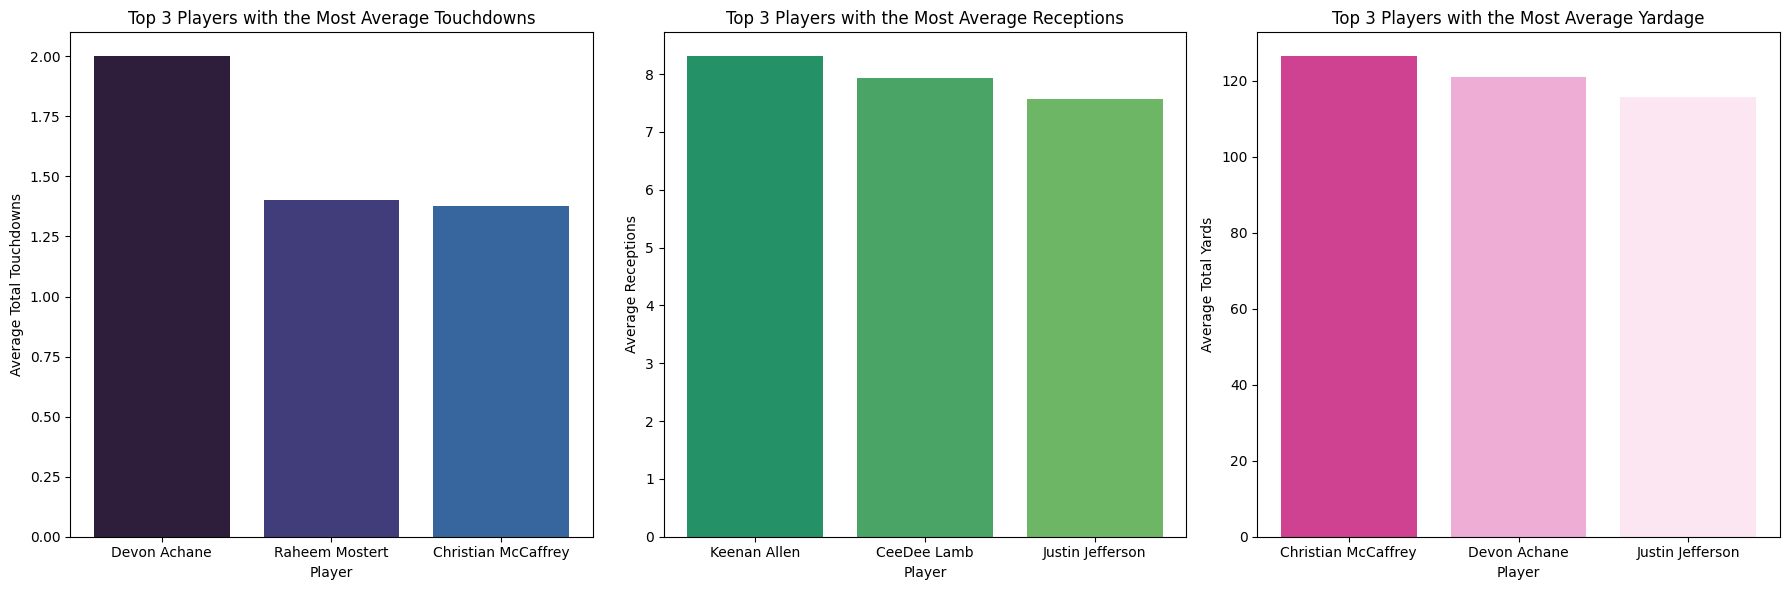

In [640]:
import matplotlib.pyplot as plt

# Top 3 players with the most average touchdowns, receptions, and yards
top_3_touchdowns = average_stats_2023['Avg Total Touchdowns'].nlargest(3)
top_3_receptions = average_stats_2023['Avg Receptions'].nlargest(3)
top_3_yards = average_stats_2023['Avg Total Yards'].nlargest(3)

# Define colors for each bar (you can adjust these or use a colormap)
colors_touchdowns = sns.color_palette(palette='mako')  
colors_receptions = sns.color_palette(palette='summer') 
colors_yards = sns.color_palette(palette='PiYG')

# Create a figure and axis for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Top 3 Players with Most Average Touchdowns
axes[0].bar(top_3_touchdowns.index, top_3_touchdowns.values, color=colors_touchdowns)
axes[0].set_title('Top 3 Players with the Most Average Touchdowns')
axes[0].set_xlabel('Player')
axes[0].set_ylabel('Average Total Touchdowns')

# Plot for Top 3 Players with Most Average Receptions
axes[1].bar(top_3_receptions.index, top_3_receptions.values, color=colors_receptions)
axes[1].set_title('Top 3 Players with the Most Average Receptions')
axes[1].set_xlabel('Player')
axes[1].set_ylabel('Average Receptions')

# Plot for Top 3 Players with Most Average Yardage
axes[2].bar(top_3_yards.index, top_3_yards.values, color=colors_yards)
axes[2].set_title('Top 3 Players with the Most Average Yardage')
axes[2].set_xlabel('Player')
axes[2].set_ylabel('Average Total Yards')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


In [641]:
# Combine the top 3 players from each category into one list
combined_top_players = top_3_touchdowns.index.tolist() + top_3_receptions.index.tolist() + top_3_yards.index.tolist()

# Create a Series to count occurrences of each player in the combined list
player_counts = pd.Series(combined_top_players).value_counts()

# Filter players who appear at least twice in all three categories
players_at_least_twice = player_counts[player_counts >= 2]

# Display the result
print("Players who have been in the top 3 of touchdowns, receptions, or yards at least twice:")
print(players_at_least_twice)


Players who have been in the top 3 of touchdowns, receptions, or yards at least twice:
Devon Achane           2
Christian McCaffrey    2
Justin Jefferson       2
Name: count, dtype: int64


In [642]:
pred_df

,team,player_id,player_name,position,depth,draft_year,draft_round,draft_pick,draft_ovr,height,...,position_fantasy_rank,total_fantasy_rank,pass_attempts,complete_pass,incomplete_pass,passing_yards,passing_air_yards,interception,pass_td,player_name_normalized
0,BUF,00-0034857,josh allen,QB,1,2018,1,7,7,77,...,1,1,522,322,150,3537,3817,11,25,josh allen
1,DAL,00-0036358,ceedee lamb,WR,1,2020,1,17,17,74,...,1,2,0,0,0,0,0,0,0,ceedee lamb
2,DAL,00-0033077,dak prescott,QB,1,2016,4,37,135,74,...,2,3,611,391,161,3949,4334,6,29,dak prescott
3,MIA,00-0033040,tyreek hill,WR,1,2016,5,28,165,70,...,2,4,0,0,0,0,0,0,0,tyreek hill
4,PHI,00-0036389,jalen hurts,QB,1,2020,2,21,53,73,...,3,5,501,303,143,3174,3520,8,20,jalen hurts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,IND,00-0033217,mo alie-cox,TE,1,2017,8,48,263,77,...,33,172,0,0,0,0,0,0,0,mo alie-cox
172,JAX,00-0036887,luke farrell,TE,1,2021,5,1,145,77,...,34,173,0,0,0,0,0,0,0,luke farrell
173,CAR,00-0034365,ian thomas,TE,1,2018,4,1,101,76,...,35,174,0,0,0,0,0,0,0,ian thomas
174,LAC,00-0036158,j.k. dobbins,RB,2,2020,2,23,55,70,...,40,175,0,0,0,0,0,0,0,j.k. dobbins


In [643]:
# Normalize player names in pred_df for matching
pred_df['player_name_normalized'] = pred_df['player_name'].str.strip().str.lower()

# Normalize the names of the players to search
player_names = ['Christian McCaffrey', 'Devon Achane', 'Justin Jefferson']
player_names_normalized = [name.strip().lower() for name in player_names]

# Filter for the players and drop duplicates
selected_player_positions = (
    pred_df.loc[pred_df['player_name_normalized'].isin(player_names_normalized), ['player_name', 'position']]
    .drop_duplicates()
)

# Display the result
print(selected_player_positions)


            player_name position
5   christian mccaffrey       RB
59     justin jefferson       WR
82         devon achane       RB


# Justin Jefferson is on the top 3 players based on the stats for the last season 2023, given the fact that he is the only WR between the 3. The comparison will be made between Justin Jefferson, Tyreek Hill and Davante Adams

# Compare them by age, fantasy points and with predictions

Filtered Dataframe 2023 Season Tyreek Hill, Davante Adams and Justin Jefferson

In [577]:
# Define the players of interest
players_of_interest = ["tyreek hill", "davante adams", "justin jefferson"]  # Ensure names are accurate

# Filter the DataFrame for the selected players and the 2023 season
players_2023_2players_df = week_df[
    (week_df['season'] == 2023) & 
    (week_df['player_name'].str.lower().isin([name.lower() for name in players_of_interest]))
]

# Reset the index for better readability
players_2023_2players_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(players_2023_2players_df)


   team   player_id       player_name position  season  week game_type  \
0    LV  00-0031381     Davante Adams       WR    2023     1       REG   
1    LV  00-0031381     Davante Adams       WR    2023     2       REG   
2    LV  00-0031381     Davante Adams       WR    2023     3       REG   
3    LV  00-0031381     Davante Adams       WR    2023     4       REG   
4    LV  00-0031381     Davante Adams       WR    2023     5       REG   
5    LV  00-0031381     Davante Adams       WR    2023     6       REG   
6    LV  00-0031381     Davante Adams       WR    2023     7       REG   
7    LV  00-0031381     Davante Adams       WR    2023     8       REG   
8    LV  00-0031381     Davante Adams       WR    2023     9       REG   
9    LV  00-0031381     Davante Adams       WR    2023    10       REG   
10   LV  00-0031381     Davante Adams       WR    2023    11       REG   
11   LV  00-0031381     Davante Adams       WR    2023    12       REG   
12   LV  00-0031381     Davante Adams 

In [578]:
# Define the players of interest
players_of_interest = ["tyreek hill", "davante adams", "justin jefferson"]  # Ensure names are accurate

# Filter the DataFrame for the selected players and the 2023 season, case-insensitive
players_2023_2players_df = week_df[
    (week_df['season'] == 2023) & 
    (week_df['player_name'].str.lower().isin([name.lower() for name in players_of_interest]))
]

# Reset the index for better readability
players_2023_2players_df.reset_index(drop=True, inplace=True)

# Add calculated columns for total touchdowns and total yards using .loc to avoid the warning
players_2023_2players_df.loc[:, 'total_touchdowns'] = players_2023_2players_df['reception_td'] + players_2023_2players_df['run_td']
players_2023_2players_df.loc[:, 'total_yards'] = players_2023_2players_df['receiving_yards'] + players_2023_2players_df['rushing_yards']

# Group by player and calculate averages for the desired metrics
average_stats = (
    players_2023_2players_df.groupby('player_name')
    .agg({
        'total_touchdowns': 'mean',  # Average weekly total touchdowns
        'total_yards': 'mean',      # Average weekly total yards
        'receptions': 'mean'        # Average weekly receptions
    })
    .rename(columns={
        'total_touchdowns': 'Avg Total Touchdowns',
        'total_yards': 'Avg Total Yards',
        'receptions': 'Avg Receptions'
    })
)

# Display the averages for the selected players
print(average_stats)



                  Avg Total Touchdowns  Avg Total Yards  Avg Receptions
player_name                                                            
Davante Adams                 0.562500        68.187500        6.000000
Justin Jefferson              0.571429       115.714286        7.571429
Tyreek Hill                   0.875000       113.375000        7.437500


/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/2489218735.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_2023_2players_df.loc[:, 'total_touchdowns'] = players_2023_2players_df['reception_td'] + players_2023_2players_df['run_td']


/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/3599927041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_name', y=metric, data=average_stats_reset, ax=axes[i], palette='viridis')
/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/3599927041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_name', y=metric, data=average_stats_reset, ax=axes[i], palette='viridis')
/var/folders/z5/9p6mflxn16bfxvds_w7ffs5m0000gn/T/ipykernel_963/3599927041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

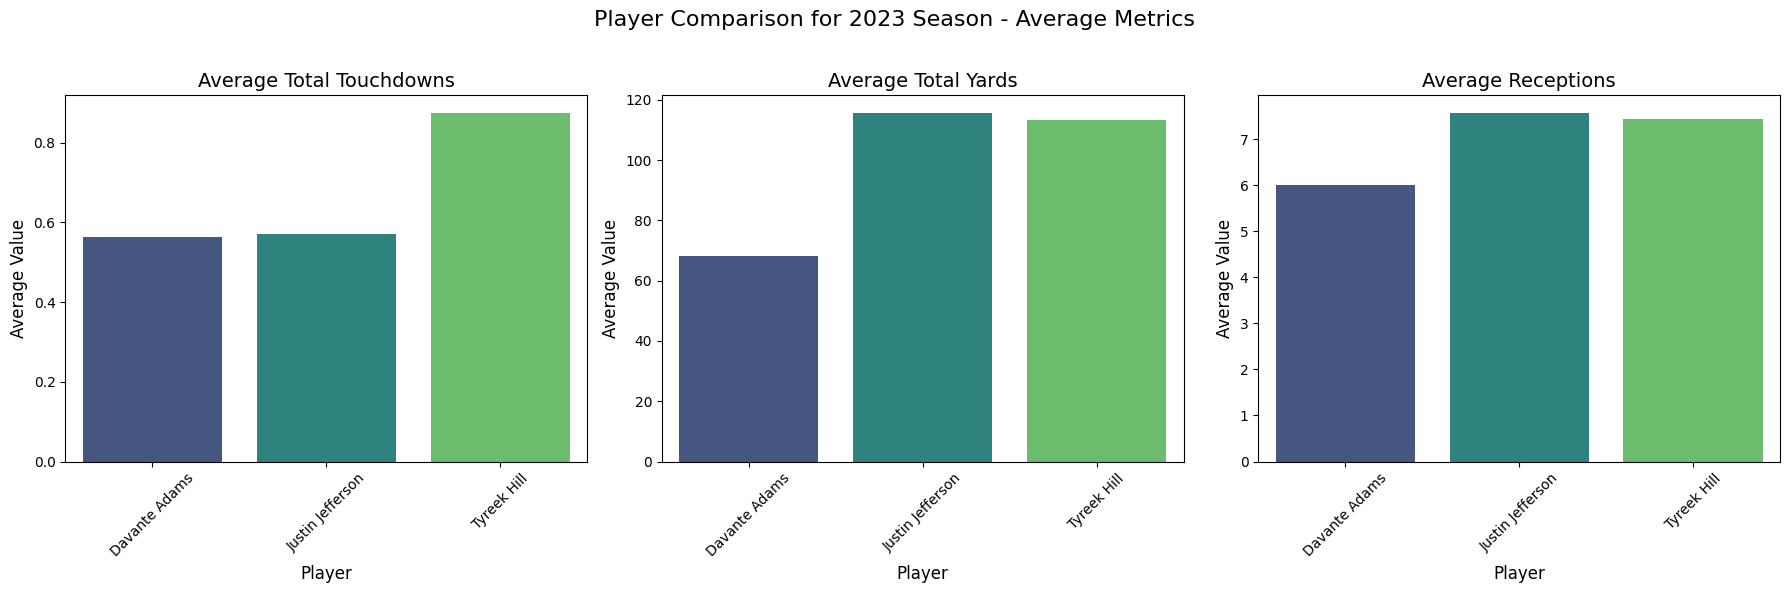

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to get player names as a column for plotting
average_stats_reset = average_stats.reset_index()

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ['Avg Total Touchdowns', 'Avg Total Yards', 'Avg Receptions']
metric_titles = ['Average Total Touchdowns', 'Average Total Yards', 'Average Receptions']

# Loop through each metric and create a bar plot in each subplot
for i, metric in enumerate(metrics):
    sns.barplot(x='player_name', y=metric, data=average_stats_reset, ax=axes[i], palette='viridis')
    axes[i].set_title(metric_titles[i], fontsize=14)
    axes[i].set_xlabel('Player', fontsize=12)
    axes[i].set_ylabel('Average Value', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate player names for better readability

# Add a title for the whole figure
fig.suptitle('Player Comparison for 2023 Season - Average Metrics', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to make room for the main title

# Display the plots
plt.show()


In [580]:
year_df

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,a.j. brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,a.j. brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,a.j. brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,a.j. brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,a.j. brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,LV,00-0033891,zay jones,WR,2021,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5659,JAX,00-0033891,zay jones,WR,2022,1.0,0.0,0.0,0.0,0.0,...,187.0,1988.0,2705.0,688.0,12.0,44.0,213.0,2.0,895.0,5908.0
5660,JAX,00-0033891,zay jones,WR,2023,1.0,0.0,0.0,0.0,0.0,...,223.0,2164.0,2396.0,1189.0,7.0,310.0,1302.0,10.0,533.0,3466.0
5661,NYJ,00-0037157,zonovan knight,RB,2022,2.0,0.0,0.0,0.0,0.0,...,101.0,1044.0,1525.0,433.0,7.0,248.0,1052.0,6.0,747.0,4072.0


In [618]:
# Define the players of interest
players_of_interest = ["tyreek hill", "davante adams", "justin jefferson"]

# Filter the DataFrame for Tyreek Hill (case-insensitive match)
tyreek_hill_df = year_df[year_df['player_name'].str.contains("tyreek hill", case=False)]

# Filter the DataFrame for Davante Adams (case-insensitive match)
davante_adams_df = year_df[year_df['player_name'].str.contains("davante adams", case=False)]

# Filter the DataFrame for Justin Jefferson (case-insensitive match)
justin_jefferson_df = year_df[year_df['player_name'].str.contains("justin jefferson", case=False)]

In [599]:
# Display the DataFrames
print("Tyreek Hill DataFrame:")
print(tyreek_hill_df)

Tyreek Hill DataFrame:
     team   player_id  player_name position  season  depth  pass_attempts  \
5471   KC  00-0033040  tyreek hill       WR    2016    1.0            0.0   
5472   KC  00-0033040  tyreek hill       WR    2017    2.0            1.0   
5473   KC  00-0033040  tyreek hill       WR    2018    1.0            0.0   
5474   KC  00-0033040  tyreek hill       WR    2019    1.0            0.0   
5475   KC  00-0033040  tyreek hill       WR    2020    2.0            0.0   
5476   KC  00-0033040  tyreek hill       WR    2021    1.0            0.0   
5477  MIA  00-0033040  tyreek hill       WR    2022    1.0            0.0   
5478  MIA  00-0033040  tyreek hill       WR    2023    2.0            0.0   

      complete_pass  incomplete_pass  passing_yards  ...  vacated_receptions  \
5471            0.0              0.0            0.0  ...               115.0   
5472            0.0              0.0            0.0  ...                16.0   
5473            0.0              0.0       

Tyreek Hill up until 2023 season

In [612]:
# Get the Tyreek Hill data from the filtered dataframe
tyreek_hill_df = year_df[year_df['player_name'].str.lower() == 'tyreek hill']

# Calculate the necessary statistics for Tyreek Hill
print("Tyreek Hill:")
print(f"Position: {tyreek_hill_df['position'].iloc[0]}")
print(f"Seasons Played: {tyreek_hill_df['season'].nunique()}")
print(f"Games per Season: {tyreek_hill_df['games'].mean():.2f}")
print(f"Draft Year: {tyreek_hill_df['draft_year'].iloc[0]}")
print(f"Average Fantasy Points (PPR): {tyreek_hill_df['average_fantasy_points_ppr'].mean()}")

# Filter the data for Tyreek Hill for the 2023 season
tyreek_2023_df = tyreek_hill_df[tyreek_hill_df['season'] == 2023]

# Extract the values for the 2023 season
total_career_receptions_2023 = tyreek_2023_df['career_receptions'].iloc[0]
total_career_total_tds_2023 = tyreek_2023_df['career_total_tds'].iloc[0]
total_career_games_2023 = tyreek_2023_df['career_games'].iloc[0]

# Print the results for 2023
print(f"Career Receptions (2023): {total_career_receptions_2023}")
print(f"Career Total TDs (2023): {total_career_total_tds_2023}")
print(f"Career Games (2023): {total_career_games_2023}")


Tyreek Hill:
Position: WR
Seasons Played: 8
Games per Season: 15.50
Draft Year: 2016.0
Average Fantasy Points (PPR): 329.53720433371404
Career Receptions (2023): 717.0
Career Total TDs (2023): 85.0
Career Games (2023): 124.0


In [602]:
# Filter pred_df for Tyreek Hill
tyreek_hill_df = pred_df[pred_df['player_name'].str.lower() == 'tyreek hill'].iloc[0]

# Extract Tyreek Hill's age
tyreek_hill_age = tyreek_hill_df['age']

# Print the age
print(f"Tyreek Hill's Age: {tyreek_hill_age}")

Tyreek Hill's Age: 29


Davante Adams up until 2023 season

In [600]:
print("\nDavante Adams DataFrame:")
print(davante_adams_df)


Davante Adams DataFrame:
     team   player_id    player_name position  season  depth  pass_attempts  \
1478   GB  00-0031381  davante adams       WR    2014    2.0            0.0   
1479   GB  00-0031381  davante adams       WR    2015    1.0            0.0   
1480   GB  00-0031381  davante adams       WR    2016    2.0            0.0   
1481   GB  00-0031381  davante adams       WR    2017    2.0            0.0   
1482   GB  00-0031381  davante adams       WR    2018    1.0            0.0   
1483   GB  00-0031381  davante adams       WR    2019    1.0            0.0   
1484   GB  00-0031381  davante adams       WR    2020    1.0            0.0   
1485   GB  00-0031381  davante adams       WR    2021    1.0            0.0   
1486   LV  00-0031381  davante adams       WR    2022    1.0            1.0   
1487   LV  00-0031381  davante adams       WR    2023    1.0            0.0   

      complete_pass  incomplete_pass  passing_yards  ...  vacated_receptions  \
1478            0.0     

In [613]:
# Get the Davante Adams data from the filtered dataframe
davante_adams_df = year_df[year_df['player_name'].str.lower() == 'davante adams']

# Calculate the necessary statistics for Davante Adams
print("Davante Adams:")
print(f"Position: {davante_adams_df['position'].iloc[0]}")
print(f"Seasons Played: {davante_adams_df['season'].nunique()}")
print(f"Games per Season: {davante_adams_df['games'].mean():.2f}")
print(f"Draft Year: {davante_adams_df['draft_year'].iloc[0]}")
print(f"Average Fantasy Points (PPR): {davante_adams_df['average_fantasy_points_ppr'].mean()}")

# Filter the data for Davante Adams for the 2023 season
davante_2023_df = davante_adams_df[davante_adams_df['season'] == 2023]

# Extract the values for the 2023 season
total_career_receptions_2023 = davante_2023_df['career_receptions'].iloc[0]
total_career_total_tds_2023 = davante_2023_df['career_total_tds'].iloc[0]
total_career_games_2023 = davante_2023_df['career_games'].iloc[0]

# Print the results for 2023
print(f"Career Receptions (2023): {total_career_receptions_2023}")
print(f"Career Total TDs (2023): {total_career_total_tds_2023}")
print(f"Career Games (2023): {total_career_games_2023}") 

Davante Adams:
Position: WR
Seasons Played: 10
Games per Season: 14.80
Draft Year: 2014.0
Average Fantasy Points (PPR): 234.74867844929767
Career Receptions (2023): 872.0
Career Total TDs (2023): 98.0
Career Games (2023): 148.0


In [614]:
# Filter pred_df for Tyreek Hill
davante_adams_df = pred_df[pred_df['player_name'].str.lower() == 'davante adams'].iloc[0]

# Extract Tyreek Hill's age
davante_adams_age = davante_adams_df['age']

# Print the age
print(f"Davante Adams's Age: {davante_adams_age}")

Davante Adams's Age: 32


Justin Jefferson 2023 season

In [619]:
print("\nJustin Jefferson DataFrame:")
print(justin_jefferson_df)


Justin Jefferson DataFrame:
     team   player_id       player_name position  season  depth  \
3200  MIN  00-0036322  justin jefferson       WR    2020    1.0   
3201  MIN  00-0036322  justin jefferson       WR    2021    1.0   
3202  MIN  00-0036322  justin jefferson       WR    2022    1.0   
3203  MIN  00-0036322  justin jefferson       WR    2023    1.0   

      pass_attempts  complete_pass  incomplete_pass  passing_yards  ...  \
3200            0.0            0.0              0.0            0.0  ...   
3201            4.0            2.0              2.0           35.0  ...   
3202            2.0            2.0              0.0           34.0  ...   
3203            1.0            0.0              1.0            0.0  ...   

      vacated_receptions  vacated_receiving_yards  \
3200                47.0                    454.0   
3201                74.0                   1356.0   
3202               102.0                   1161.0   
3203                82.0                    829

In [620]:
# Get the Justin Jefferson data from the filtered dataframe
justin_jefferson_df = year_df[year_df['player_name'].str.lower() == 'justin jefferson']
# Calculate the necessary statistics for Davante Adams
print("Justin Jefferson:")
print(f"Position: {justin_jefferson_df['position'].iloc[0]}")
print(f"Seasons Played: {justin_jefferson_df['season'].nunique()}")
print(f"Games per Season: {justin_jefferson_df['games'].mean():.2f}")
print(f"Draft Year: {justin_jefferson_df['draft_year'].iloc[0]}")
print(f"Average Fantasy Points (PPR): {justin_jefferson_df['average_fantasy_points_ppr'].mean()}")

# Filter the data for Justin Jefferson for the 2023 season
justin_2023_df = justin_jefferson_df[justin_jefferson_df['season'] == 2023]

# Extract the values for the 2023 season
total_career_receptions_2023 = justin_2023_df['career_receptions'].iloc[0]
total_career_total_tds_2023 = justin_2023_df['career_total_tds'].iloc[0]
total_career_games_2023 = justin_2023_df['career_games'].iloc[0]

# Print the results for 2023
print(f"Career Receptions (2023): {total_career_receptions_2023}")
print(f"Career Total TDs (2023): {total_career_total_tds_2023}")
print(f"Career Games (2023): {total_career_games_2023}") 

Justin Jefferson:
Position: WR
Seasons Played: 4
Games per Season: 15.00
Draft Year: 2020.0
Average Fantasy Points (PPR): 435.4291648864746
Career Receptions (2023): 392.0
Career Total TDs (2023): 31.0
Career Games (2023): 60.0


In [621]:
# Filter pred_df for Justin Jefferson
justin_jefferson_df = pred_df[pred_df['player_name'].str.lower() == 'justin jefferson'].iloc[0]

# Extract Tyreek Hill's age
justin_jefferson_age = justin_jefferson_df['age']

# Print the age
print(f"Justin Jefferson's Age: {justin_jefferson_age}")

Justin Jefferson's Age: 25


In [625]:
import pandas as pd

# Data for Tyreek Hill
tyreek_data = {
    "Position": "WR",
    "Seasons Played": 8,
    "Games per Season": 15.50,
    "Draft Year": 2016,
    "Average Fantasy Points (PPR)": 329.53,
    "Career Receptions (2023)": 717,
    "Career Total TDs (2023)": 85,
    "Career Games (2023)": 124
}

# Data for Davante Adams
davante_data = {
    "Position": "WR",
    "Seasons Played": 10,
    "Games per Season": 14.80,
    "Draft Year": 2014,
    "Average Fantasy Points (PPR)": 234.74,
    "Career Receptions (2023)": 872,
    "Career Total TDs (2023)": 98,
    "Career Games (2023)": 148
}

# Data for Justin Jefferson
justin_jefferson_data = {
    "Position": "WR",
    "Seasons Played": 4,
    "Games per Season": 15.00,
    "Draft Year": 2020,
    "Average Fantasy Points (PPR)": 435.42,
    "Career Receptions (2023)": 392,
    "Career Total TDs (2023)": 31,
    "Career Games (2023)": 60
}

# Create a DataFrame to compare the stats
comparison_df = pd.DataFrame({
    "Stat": ["Position", "Seasons Played", "Games per Season", "Draft Year", 
             "Average Fantasy Points (PPR)", "Career Receptions (2023)", 
             "Career Total TDs (2023)", "Career Games (2023)"],
    "Tyreek Hill": [tyreek_data["Position"], tyreek_data["Seasons Played"], tyreek_data["Games per Season"], tyreek_data["Draft Year"],
                    tyreek_data["Average Fantasy Points (PPR)"], tyreek_data["Career Receptions (2023)"], tyreek_data["Career Total TDs (2023)"], tyreek_data["Career Games (2023)"]],
    "Davante Adams": [davante_data["Position"], davante_data["Seasons Played"], davante_data["Games per Season"], davante_data["Draft Year"],
                      davante_data["Average Fantasy Points (PPR)"], davante_data["Career Receptions (2023)"], davante_data["Career Total TDs (2023)"], davante_data["Career Games (2023)"]],
    "Justin Jefferson": [justin_jefferson_data["Position"], justin_jefferson_data["Seasons Played"], justin_jefferson_data["Games per Season"], justin_jefferson_data["Draft Year"],
                         justin_jefferson_data["Average Fantasy Points (PPR)"], justin_jefferson_data["Career Receptions (2023)"], justin_jefferson_data["Career Total TDs (2023)"], justin_jefferson_data["Career Games (2023)"]]
})

# Display the comparison
print(comparison_df)


                           Stat Tyreek Hill Davante Adams Justin Jefferson
0                      Position          WR            WR               WR
1                Seasons Played           8            10                4
2              Games per Season        15.5          14.8             15.0
3                    Draft Year        2016          2014             2020
4  Average Fantasy Points (PPR)      329.53        234.74           435.42
5      Career Receptions (2023)         717           872              392
6       Career Total TDs (2023)          85            98               31
7           Career Games (2023)         124           148               60


In [627]:
import pandas as pd

# Data for the players
players_data = {
    "Player": ["Tyreek Hill", "Davante Adams", "Justin Jefferson"],
    "Seasons Played": [8, 10, 4],
    "Career Receptions (2023)": [717, 872, 392],
    "Career Total TDs (2023)": [85, 98, 31],
    "Career Games (2023)": [124, 148, 60]
}

# Create a DataFrame to hold the players' data
players_df = pd.DataFrame(players_data)

# Calculate the per-season averages for each metric
players_df["Avg Receptions per Season"] = players_df["Career Receptions (2023)"] / players_df["Seasons Played"]
players_df["Avg TDs per Season"] = players_df["Career Total TDs (2023)"] / players_df["Seasons Played"]
players_df["Avg Games per Season"] = players_df["Career Games (2023)"] / players_df["Seasons Played"]

# Analyze and compare the efficiency per season
for index, row in players_df.iterrows():
    print(f"\n{row['Player']}:")
    print(f"  - Average Receptions per Season: {row['Avg Receptions per Season']:.2f}")
    print(f"  - Average Touchdowns per Season: {row['Avg TDs per Season']:.2f}")
    print(f"  - Average Games per Season: {row['Avg Games per Season']:.2f}")

# Find the player with the highest per-season averages in each category
max_receptions_player = players_df.loc[players_df["Avg Receptions per Season"].idxmax()]["Player"]
max_td_player = players_df.loc[players_df["Avg TDs per Season"].idxmax()]["Player"]
max_games_player = players_df.loc[players_df["Avg Games per Season"].idxmax()]["Player"]

# Display the comparison results
print("\nComparison:")
print(f"Player with highest average receptions per season: {max_receptions_player}")
print(f"Player with highest average touchdowns per season: {max_td_player}")
print(f"Player with highest average games per season: {max_games_player}")



Tyreek Hill:
  - Average Receptions per Season: 89.62
  - Average Touchdowns per Season: 10.62
  - Average Games per Season: 15.50

Davante Adams:
  - Average Receptions per Season: 87.20
  - Average Touchdowns per Season: 9.80
  - Average Games per Season: 14.80

Justin Jefferson:
  - Average Receptions per Season: 98.00
  - Average Touchdowns per Season: 7.75
  - Average Games per Season: 15.00

Comparison:
Player with highest average receptions per season: Justin Jefferson
Player with highest average touchdowns per season: Tyreek Hill
Player with highest average games per season: Tyreek Hill


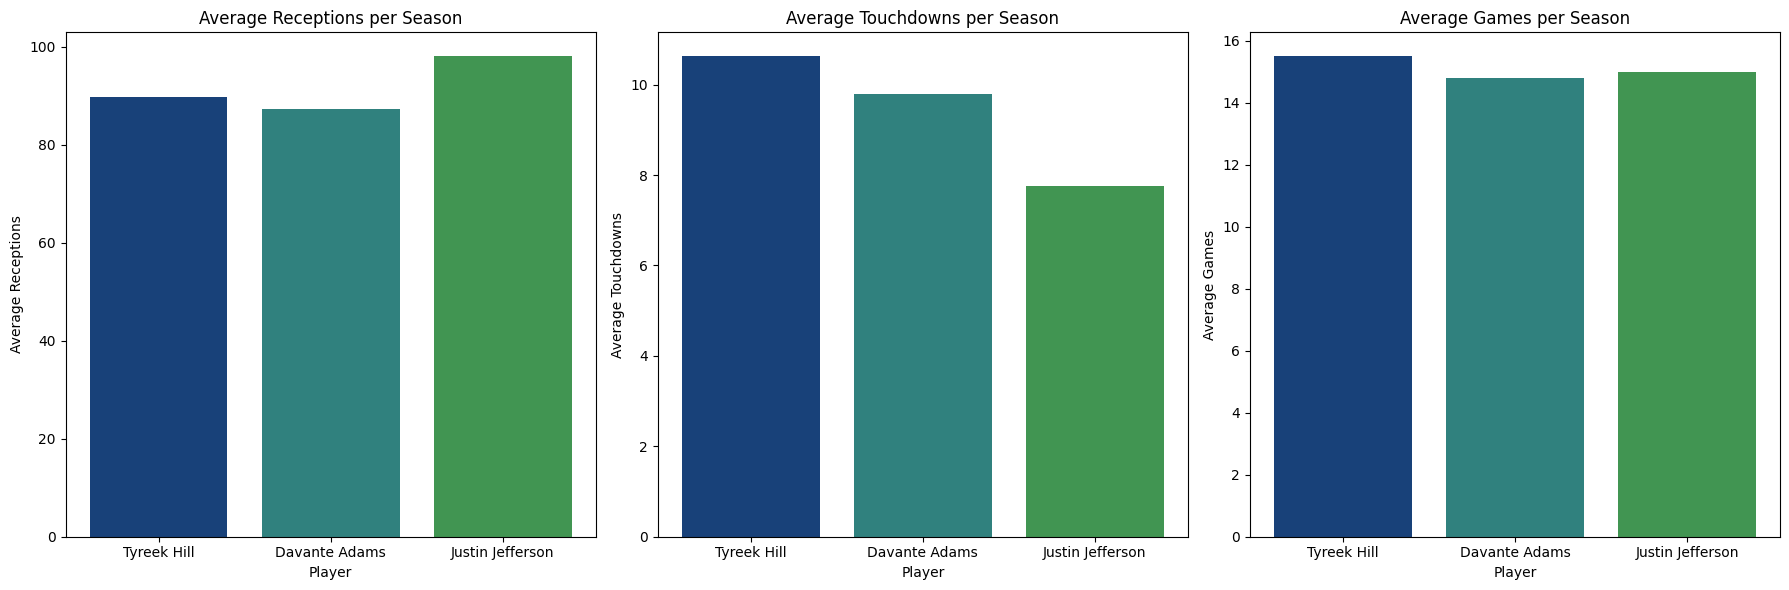

In [632]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the players
players_data = {
    "Player": ["Tyreek Hill", "Davante Adams", "Justin Jefferson"],
    "Seasons Played": [8, 10, 4],
    "Career Receptions (2023)": [717, 872, 392],
    "Career Total TDs (2023)": [85, 98, 31],
    "Career Games (2023)": [124, 148, 60]
}

# Create a DataFrame to hold the players' data
players_df = pd.DataFrame(players_data)

# Calculate the per-season averages for each metric
players_df["Avg Receptions per Season"] = players_df["Career Receptions (2023)"] / players_df["Seasons Played"]
players_df["Avg TDs per Season"] = players_df["Career Total TDs (2023)"] / players_df["Seasons Played"]
players_df["Avg Games per Season"] = players_df["Career Games (2023)"] / players_df["Seasons Played"]

# Plotting the per-season averages

# Create a figure and axis object for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Average Receptions per Season
axes[0].bar(players_df['Player'], players_df['Avg Receptions per Season'], color= sns.color_palette(palette='gist_earth'))
axes[0].set_title('Average Receptions per Season')
axes[0].set_ylabel('Average Receptions')
axes[0].set_xlabel('Player')

# Plot Average Touchdowns per Season
axes[1].bar(players_df['Player'], players_df['Avg TDs per Season'], color= sns.color_palette(palette='gist_earth'))
axes[1].set_title('Average Touchdowns per Season')
axes[1].set_ylabel('Average Touchdowns')
axes[1].set_xlabel('Player')

# Plot Average Games per Season
axes[2].bar(players_df['Player'], players_df['Avg Games per Season'], color= sns.color_palette(palette='gist_earth'))
axes[2].set_title('Average Games per Season')
axes[2].set_ylabel('Average Games')
axes[2].set_xlabel('Player')

# Add labels showing the highest average player for each category
max_receptions_player = players_df.loc[players_df["Avg Receptions per Season"].idxmax()]["Player"]
max_td_player = players_df.loc[players_df["Avg TDs per Season"].idxmax()]["Player"]
max_games_player = players_df.loc[players_df["Avg Games per Season"].idxmax()]["Player"]

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Normalization 

In [ ]:
year_df

# Predictions 2024 

# Machine learning model

In [646]:
import pandas as pd
import kagglehub
import os


# Fetch data from Kaggle API
try:
    path = kagglehub.dataset_download("abdelazizsami/wine-quality")  # Downloads the dataset
    print("Data downloaded from Kaggle to:", path)
except Exception as e:
    print(f"Failed to download data from Kaggle: {e}")

# Get the list of files in the downloaded directory dynamically
downloaded_files = os.listdir(path)

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the files in the directory
for file_name in downloaded_files:
    # Skip non-CSV files like .DS_Store or other irrelevant files
    if not file_name.endswith('.csv'):
        print(f"Skipping non-CSV file: {file_name}")
        continue
    
    # Build the full file path
    file_path = os.path.join(path, file_name)
    
    # Read the CSV file into a DataFrame
    try:
        df = pd.read_csv(file_path)
        dataframes.append(df)  # Add this DataFrame to the list
        print(f"Loaded {file_name} successfully.")
    except Exception as e:
        print(f"Failed to load {file_name}: {e}")

# Combine all DataFrames (if there are multiple CSV files) into one
if dataframes:
    df_battery = pd.concat(dataframes, ignore_index=True)  # Combine them into one DataFrame
    print("Combined DataFrame created.")
else:
    df_battery = pd.DataFrame()  # If no CSVs are found, create an empty DataFrame

# Display the first few rows of the DataFrame
print(df_battery.head())


100%|██████████| 97.1k/97.1k [00:00<00:00, 54.8MB/s]

Extracting files...
Data downloaded from Kaggle to: /Users/salomerivas/.cache/kagglehub/datasets/abdelazizsami/wine-quality/versions/1
Loaded winequality-red.csv successfully.
Skipping non-CSV file: winequality.names
Loaded winequality-white.csv successfully.
Combined DataFrame created.
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;6

In [645]:
df_battery

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
